# Project 2: Potential Flow

In this project, the concepts of simple flow superposition is explored to set up useful airfoil analysis tools. By defining singularity sources, sinks, and uniform flows and combining them to create more complex flows, we are able to calculate flow parameters over approximated complex surfaces with algrebraically simple elements.

## Problem 1: Freestream/source Superposition
The first section will focus on the superposition of a source and uniform flow. The source strength and freestream velocities will be varied separately to investigate their relative effects on the overall flow and the dividing streamline diameter.

### Problem 1.1: Superposition Plot
The resultant flow field of a point source and a uniform field is plotted and analyzed in the following code section. The flow field will be plotted and annotated with information on the dividing streamline and stagnation point.

<ipython-input-2-4c498c16c1f7>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-2-4c498c16c1f7>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


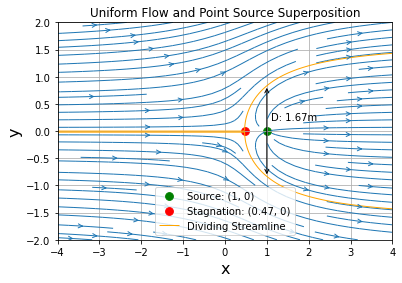

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# given from problem statement
freestream = 0.6
strength = 2

# The following functions are based on those found in the AeroPython tutorials
n = 201 # I'm using the extra +1 to help get cleaner increments in linspace                      
x_start, x_end = -4.0, 4.0           
y_start, y_end = -2.0, 2.0
x = np.linspace(x_start, x_end, n)
y = np.linspace(y_start, y_end, n)   
X, Y = np.meshgrid(x, y)  

u_freestream = freestream * np.ones((n, n), dtype=float) # defining a uniform flow in the x-direction
v_freestream = np.zeros((n, n), dtype=float)
psi_freestream = freestream * Y # stream function for uniform flow

# this function is for the velocity at any point in the grid due to the source which sits at (xs, ys)
def get_velocity(strength, xs, ys, X, Y):
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    return u, v

# this one is for calculating the stream function of the source at any point in the grid
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    return psi

xs = 1
ys = 0

u_source, v_source = get_velocity(strength, xs, ys, X, Y)
psi_source = get_stream_function(strength, xs, ys, X, Y)

# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
fig, ax = plt.subplots()
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.title('Uniform Flow and Point Source Superposition')
plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(xs, ys, color='g', s=60, marker='o', label=f'Source: ({xs}, {ys})')

# calculate the stagnation point
x_stagnation = xs - strength / (2 * np.pi * freestream)
y_stagnation = ys

# display the stagnation point
plt.scatter(x_stagnation, y_stagnation, color='r', s=60, marker='o', label=f'Stagnation: ({x_stagnation:.2f}, {y_stagnation})')

# display the dividing streamline
c = ax.contour(X, Y, psi, 
               levels=[-strength / 2, strength / 2], 
               colors=['orange'], linewidths=1, linestyles='solid')
c.collections[0].set_label('Dividing Streamline')

# display the diameter of the dividing streamline
path = c.collections[0].get_paths()[0]
vertices = path.vertices.copy()

# this is probably not the best way to find the endpoints of the dividing SL but it is the only working method I was able to come up with
for i in range(len(vertices)): # searching for the point on the contour that is above/below the point source origin
    if abs((xs - vertices[i][0])/xs*100) < 1: # I have to search in a small range here because the x-values are not clean
        vertex = vertices[i]
        arrow = plt.annotate(text='', xy=(vertex[0],vertex[1]), xytext=(vertex[0],-vertex[1]), arrowprops=dict(arrowstyle='<->')) # the diameter arrow
        plt.text((vertex[0]+0.1), 0.2, f'D: {(abs(vertex[1]*2)):.2f}m') # labeling and displaying the diameter length
        break # only do this search once


plt.legend()
plt.show()

### Problem 1.2: Source Strength and Freestream Variation
As the strength of the source and the freestream velocity change, we expect to see the location of the stagnation point and the dividing streamline change since the stagnation point is a function of the freestream velocity and the source strength. Those parameters are varied individually in the following code section to demonstrate how the parameters affect the stagnation point and dividing streamline.

In [4]:
import pandas as pd # for tabulating SL diam and stag points later
# holding freestream velocity constant, varying source strength from 2 to 3
freestream  = 0.6
strength = np.linspace(start=2, stop=3, num=11) # 0.1 increments
xs = 1
ys = 0

D = [] # SL diameters
stag_points_x = []
stag_points_y = []

# I could probably make this more modular and efficient by defining some functions but I am going the simpler/longer way
for i in range(len(strength)):
    # new stagnation point
    x_stagnation = xs - strength[i] / (2 * np.pi * freestream)
    y_stagnation = ys
    
    stag_points_x.append(x_stagnation)
    stag_points_y.append(y_stagnation)
    
    u_source, v_source = get_velocity(strength[i], xs, ys, X, Y) # new flow field from source
    psi_source = get_stream_function(strength[i], xs, ys, X, Y) # new SL's from source
    
    u_freestream = freestream * np.ones((n, n), dtype=float) # new freestream velocity and SL
    v_freestream = np.zeros((n, n), dtype=float)
    psi_freestream = freestream * Y 
    
    u = u_freestream + u_source # new superposition of freestream and source velocities and SL
    v = v_freestream + v_source
    psi = psi_freestream + psi_source
    
    fig, ax = plt.subplots()
    c = ax.contour(X, Y, psi, 
               levels=[-strength[i] / 2, strength[i] / 2], 
               colors=['orange'], linewidths=1, linestyles='solid') # I need to generate the points of the dividing SL curve
    path = c.collections[0].get_paths()[0] 
    vertices = path.vertices.copy()
    
    for j in range(len(vertices)): # searching for the point on the contour that is above/below the point source origin
        if abs((xs - vertices[j][0])/xs*100) < 1: # I have to search in a small range here because the x-values are not clean
            vertex = vertices[j] # found the point on contour that is (almost) directly above/below source
            d = abs(vertex[1]*2) # diameter is the twice the y-value
            D.append(d) # diameter is the twice the y-value
            break # only do this search once
    
    if i != len(strength)-1: # only plot the last one
        plt.close() # do not display the graph
    else:
        arrow = plt.annotate(text='', xy=(vertex[0],vertex[1]), xytext=(vertex[0],-vertex[1]), arrowprops=dict(arrowstyle='<->')) # the diameter arrow
        plt.text((vertex[0]+0.1), 0.2, f'D: {(abs(vertex[1]*2)):.2f}m') # labeling and displaying the diameter length
        c.collections[0].set_label('Dividing Streamline')

        plt.scatter(xs, ys, color='g', s=60, marker='o', label=f'Source: ({xs}, {ys})')
        plt.scatter(x_stagnation, y_stagnation, color='r', s=60, marker='o', label=f'Stagnation: ({x_stagnation:.2f}, {y_stagnation})')
        
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        
        plt.title('Uniform Flow and Point Source Superposition: Strength = 3')
        plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
        plt.grid()
        plt.legend()
        plt.show()
    #data.append([strength[i], D[i], x_stagnation, y_stagnation])

print('_________________________________________________________')
print('Tabulated stagnation points and dividing SL diameter based on varying source strength')
d = {'Strength [m/s]': strength, 'Dividing SL Diameter [m]': D, 'X_stag [m]': stag_points_x, 'Y_stag [m]': stag_points_y}
print(pd.DataFrame(d))

# plotting dividing streamline diameter as a function of source strength
plt.plot(strength, D)
plt.title('Dividing SL Diameter vs Source Strength')
plt.xlabel('Source Strength [m2/s]')
plt.ylabel('Dividing SL Diameter [m]')
plt.grid()
plt.show()

<ipython-input-2-4c498c16c1f7>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-2-4c498c16c1f7>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


ValueError: operands could not be broadcast together with shapes (211,211) (201,201) 

I find it interesting that the relationship between the dividing streamline diameter and source strength is so linear. The data is displayed as being not perfectly linear but it is very close. The dividing SL diameter increases as the source strength increases as expected. This is intuitive as an increasingly strong source would push the surrounding flow further away from the source.

<ipython-input-23-4c498c16c1f7>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-23-4c498c16c1f7>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


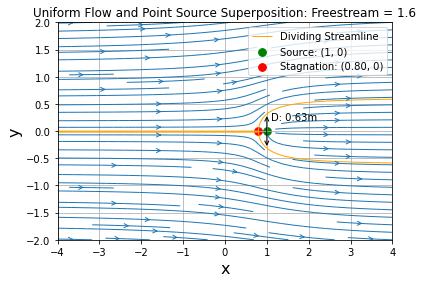

_________________________________________________________
Tabulated stagnation points and dividing SL diameter based on varying freestream velocity
    Freestream [m/s]  Dividing SL Diameter [m]  X_stag [m]  Y_stag [m]
0                0.6                  1.666667    0.469484           0
1                0.7                  1.428571    0.545272           0
2                0.8                  1.240000    0.602113           0
3                0.9                  1.111111    0.646322           0
4                1.0                  1.000000    0.681690           0
5                1.1                  0.909091    0.710627           0
6                1.2                  0.833333    0.734742           0
7                1.3                  0.760000    0.755146           0
8                1.4                  0.714286    0.772636           0
9                1.5                  0.666667    0.787793           0
10               1.6                  0.625000    0.801056           0


In [25]:
# Repeating the above but holding strength constant while varying freestream velocity
freestream  = np.linspace(start=0.6, stop=1.6, num=11)
strength = 2
xs = 1
ys = 0

D = [] # SL diameters
stag_points_x = []
stag_points_y = []

# I could probably make this more modular and efficient by defining some functions but I am going the simpler/longer way
for i in range(len(freestream)):
    # new stagnation point
    x_stagnation = xs - strength / (2 * np.pi * freestream[i])
    y_stagnation = ys
    
    stag_points_x.append(x_stagnation)
    stag_points_y.append(y_stagnation)
    
    u_source, v_source = get_velocity(strength, xs, ys, X, Y) # new flow field from source
    psi_source = get_stream_function(strength, xs, ys, X, Y) # new SL's from source
    
    u_freestream = freestream[i] * np.ones((n, n), dtype=float) # new freestream velocity and SL
    v_freestream = np.zeros((n, n), dtype=float)
    psi_freestream = freestream[i] * Y 
    
    u = u_freestream + u_source # new superposition of freestream and source velocities and SL
    v = v_freestream + v_source
    psi = psi_freestream + psi_source
    
    fig, ax = plt.subplots()
    c = ax.contour(X, Y, psi, 
               levels=[-strength / 2, strength / 2], 
               colors=['orange'], linewidths=1, linestyles='solid') # I need to generate the points of the dividing SL curve
    path = c.collections[0].get_paths()[0] 
    vertices = path.vertices.copy()
    
    for j in range(len(vertices)): # searching for the point on the contour that is above/below the point source origin
        if abs((xs - vertices[j][0])/xs*100) < 1: # I have to search in a small range here because the x-values are not clean
            vertex = vertices[j] # found the point on contour that is (almost) directly above/below source
            d = abs(vertex[1]*2) # diameter is the twice the y-value
            D.append(d) # diameter is the twice the y-value
            break # only do this search once
    
    if i != len(freestream)-1: # only plot the last one
        plt.close() # do not display the graph
    else:
        arrow = plt.annotate(text='', xy=(vertex[0],vertex[1]), xytext=(vertex[0],-vertex[1]), arrowprops=dict(arrowstyle='<->')) # the diameter arrow
        plt.text((vertex[0]+0.1), 0.2, f'D: {(abs(vertex[1]*2)):.2f}m') # labeling and displaying the diameter length
        c.collections[0].set_label('Dividing Streamline')

        plt.scatter(xs, ys, color='g', s=60, marker='o', label=f'Source: ({xs}, {ys})')
        plt.scatter(x_stagnation, y_stagnation, color='r', s=60, marker='o', label=f'Stagnation: ({x_stagnation:.2f}, {y_stagnation})')
        
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        
        plt.title('Uniform Flow and Point Source Superposition: Freestream = 1.6')
        plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
        plt.grid()
        plt.legend()
        plt.show()

print('_________________________________________________________')
print('Tabulated stagnation points and dividing SL diameter based on varying freestream velocity')
d = {'Freestream [m/s]': freestream, 'Dividing SL Diameter [m]': D, 'X_stag [m]': stag_points_x, 'Y_stag [m]': stag_points_y}
print(pd.DataFrame(d))

## Problem 2: Potential Flow Airfoil Representation
Using a combination of several sources and sinks in a uniform flow, an airfoil shape can be approximated with the dividing streamline. In the following code, the creation of a symmetric airfoil is attempted with varying source and sink strengths and locations. It is important that the sum of all the strengths of the sources and sinks is equal to zero so that there is no net inward or outward flow in the airfoil body. That would eliminate the dividing streamline that we are after and the airfoil geometry since no flow can pass through a streamline. Since the sharp trailing edge is very difficult to approximate with this method, only the first three quarters of the chord length will be focused on for the approximations.

ERROR: SOURCE STRENGTHS SUM DOES NOT EQUAL 0


<ipython-input-2-4c498c16c1f7>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-2-4c498c16c1f7>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


ERROR: SOURCE STRENGTHS SUM DOES NOT EQUAL 0


<ipython-input-2-4c498c16c1f7>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-2-4c498c16c1f7>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


ERROR: SOURCE STRENGTHS SUM DOES NOT EQUAL 0


<ipython-input-2-4c498c16c1f7>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-2-4c498c16c1f7>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


Multiple paths in dividing streamline, select the best one


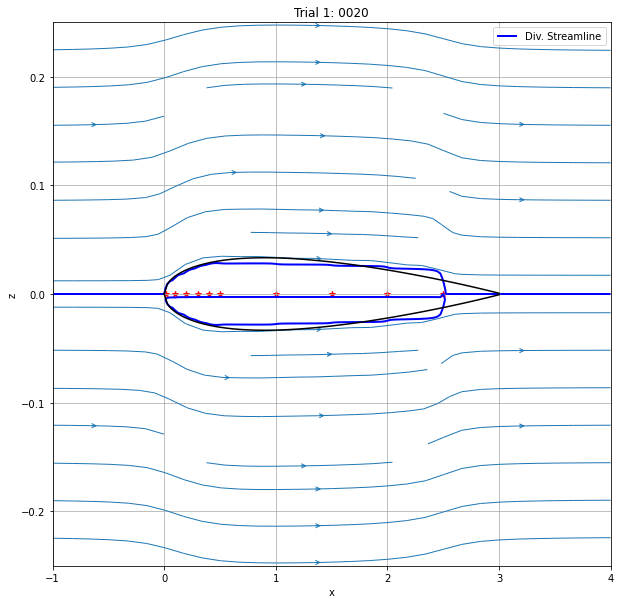

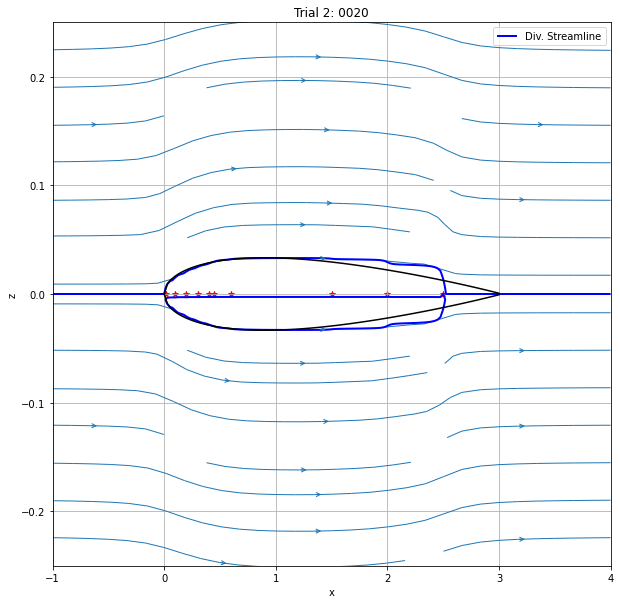

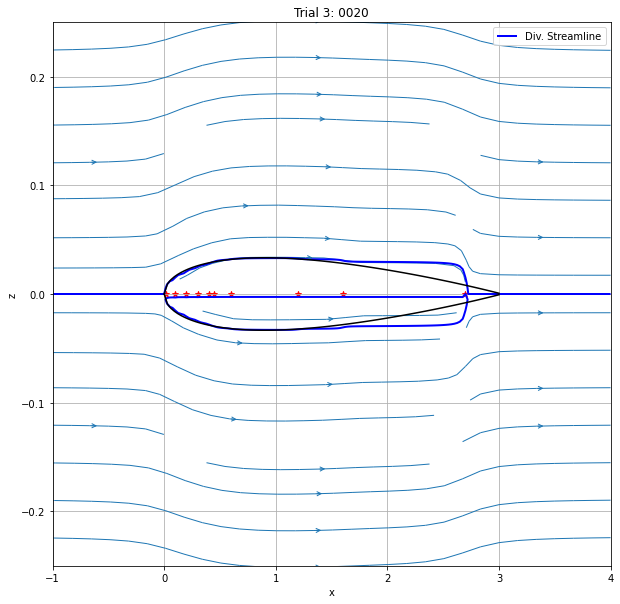

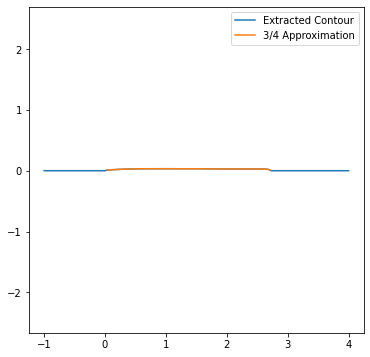

44     0.036482
45     0.050000
46     0.075000
47     0.097626
48     0.100000
         ...   
156    2.675000
157    2.685199
158    2.699875
159    2.700000
160    2.710925
Name: x, Length: 117, dtype: float64
44     0.010000
45     0.011672
46     0.012767
47     0.015000
48     0.015226
         ...   
156    0.022874
157    0.020000
158    0.015000
159    0.014951
160    0.010000
Name: y, Length: 117, dtype: float64


In [13]:
alpha = 0 # zero angle of attack
freestream = 2 # ft/s
chord = 3 # ft

# from project 1, generating a symmetric airfoil 0012
airfoil = '0020'

# This function plots a given NACA symmetric airfoil
def airfoil_surface(airfoil, c):
    
    tau = ''.join(list(airfoil)[2:4]) # grab just the third and fourth digits from the NACA code
    t = int(tau)/100/c

    x = np.linspace(start=0, stop=1, num=100)
    x *= c # just in case chord is not 1
    # Given formula for symmetric airfoil surface points
    zt_c_upper = t/0.2*(0.2969*(x/c)**0.5 - 0.126*(x/c) - 0.3516*(x/c)**2 + 0.2843*(x/c)**3 - 0.1015*(x/c)**4) 
    zt_c_lower = -zt_c_upper # The lower surface is just the reflection of the upper surface
    camber = 0*x
    
    # output in following format: [[x], [top surface], [bottom surface], [camber]]
    return [x, zt_c_upper, zt_c_lower, camber]


# creating the mesh as done before
n = 201
x_start, x_end = -1.0, 4.0
y_start, y_end = -0.5, 0.5
x = np.linspace(x_start, x_end, n)
y = np.linspace(y_start, y_end, n)   
X, Y = np.meshgrid(x, y)  

u_freestream = freestream * np.ones((n, n), dtype=float) # defining a uniform flow in the x-direction
v_freestream = np.zeros((n, n), dtype=float)
psi_freestream = freestream * Y # stream function for uniform flow

# guess #1 locations and strengths of sources and sinks
fig1, ax1 = plt.subplots(figsize=(10, 10))

strength = np.array([0.05, 0.025, 0.02, 0.015, 0.01, -0.005, -0.005,  -0.005, -0.01, -0.095])
if np.sum(strength) < 0.00001 and np.sum(strength) > -0.00001:
    print('ERROR: SOURCE STRENGTHS SUM DOES NOT EQUAL 0') # make sure the sum equals zero
x_sourceLoc = np.array([0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 2.5])
y_sourceLoc = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


u_source, v_source = get_velocity(strength[0], x_sourceLoc[0], y_sourceLoc[0], X, Y)
psi_source = get_stream_function(strength[0], x_sourceLoc[0], y_sourceLoc[0], X, Y)

for i in range(1, len(strength)):
    us, vs = get_velocity(strength[i], x_sourceLoc[i], y_sourceLoc[i], X, Y)
    u_source += us
    v_source += vs
    psi_source += get_stream_function(strength[i], x_sourceLoc[i], y_sourceLoc[i], X, Y)
    
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
ax1.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
# plotting predetermined symmetric airfoil    
airfoil_geometry = airfoil_surface(airfoil, chord) # run the function with the previously chosen airfoil and chord length
ax1.plot(airfoil_geometry[0], airfoil_geometry[1], 'k') # Plot upper surface
ax1.plot(airfoil_geometry[0], airfoil_geometry[2], 'k') # Plot lower surface

ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_title(f'Trial 1: 0020')
ax1.grid()
ax1.set_xlim(x_start, x_end)
ax1.set_ylim(y_start/2, y_end/2)
CS = ax1.contour(X,Y,psi,levels=[0.0],colors='b',linewidths=2,linestyles='solid')
CS.collections[0].set_label('Div. Streamline')
ax1.scatter(x_sourceLoc, y_sourceLoc, color='r', marker='*')
ax1.legend()

# guess #2 locations and strengths of sources and sinks
fig2, ax2 = plt.subplots(figsize=(10, 10))
strength = np.array([0.05, 0.025, 0.02, 0.015, 0.01, 0.01, 0.005,  -0.005, -0.02, -0.11])
if np.sum(strength) < 0.00001 and np.sum(strength) > -0.00001:
    print('ERROR: SOURCE STRENGTHS SUM DOES NOT EQUAL 0') # make sure the sum equals zero
x_sourceLoc = np.array([0.02, 0.1, 0.2, 0.3, 0.4, 0.45, .6, 1.5, 2, 2.5])
y_sourceLoc = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

u_source, v_source = get_velocity(strength[0], x_sourceLoc[0], y_sourceLoc[0], X, Y)
psi_source = get_stream_function(strength[0], x_sourceLoc[0], y_sourceLoc[0], X, Y)

for i in range(1, len(strength)):
    us, vs = get_velocity(strength[i], x_sourceLoc[i], y_sourceLoc[i], X, Y)
    u_source += us
    v_source += vs
    psi_source += get_stream_function(strength[i], x_sourceLoc[i], y_sourceLoc[i], X, Y)
    
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
ax2.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
# plotting predetermined symmetric airfoil    
airfoil_geometry = airfoil_surface(airfoil, chord) # run the function with the previously chosen airfoil and chord length
ax2.plot(airfoil_geometry[0], airfoil_geometry[1], 'k') # Plot upper surface
ax2.plot(airfoil_geometry[0], airfoil_geometry[2], 'k') # Plot lower surface

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title(f'Trial 2: 0020')
ax2.grid()
ax2.set_xlim(x_start, x_end)
ax2.set_ylim(y_start/2, y_end/2)
CS = ax2.contour(X,Y,psi,levels=[0.0],colors='b',linewidths=2,linestyles='solid')
CS.collections[0].set_label('Div. Streamline')
ax2.scatter(x_sourceLoc, y_sourceLoc, color='r', marker='*')
ax2.legend()

# guess #3 locations and strengths of sources and sinks
fig3, ax3 = plt.subplots(figsize=(10, 10))

strength = np.array([0.05, 0.025, 0.02, 0.015, 0.01, 0.01, 0.005,  -0.005, -0.01, -0.12])
if np.sum(strength) < 0.00001 and np.sum(strength) > -0.00001:
    print('ERROR: SOURCE STRENGTHS SUM DOES NOT EQUAL 0') # make sure the sum equals zero
x_sourceLoc = np.array([0.02, 0.1, 0.2, 0.3, 0.4, 0.45, 0.6, 1.2, 1.6, 2.7])
y_sourceLoc = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

u_source, v_source = get_velocity(strength[0], x_sourceLoc[0], y_sourceLoc[0], X, Y)
psi_source = get_stream_function(strength[0], x_sourceLoc[0], y_sourceLoc[0], X, Y)

for i in range(1, len(strength)):
    us, vs = get_velocity(strength[i], x_sourceLoc[i], y_sourceLoc[i], X, Y)
    u_source += us
    v_source += vs
    psi_source += get_stream_function(strength[i], x_sourceLoc[i], y_sourceLoc[i], X, Y)
    
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
ax3.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
# plotting predetermined symmetric airfoil    
airfoil_geometry = airfoil_surface(airfoil, chord) # run the function with the previously chosen airfoil and chord length
ax3.plot(airfoil_geometry[0], airfoil_geometry[1], 'k') # Plot upper surface
ax3.plot(airfoil_geometry[0], airfoil_geometry[2], 'k') # Plot lower surface

ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_title(f'Trial 3: 0020')
ax3.grid()
ax3.set_xlim(x_start, x_end)
ax3.set_ylim(y_start/2, y_end/2)
CS = ax3.contour(X,Y,psi,levels=[0.0],colors='b',linewidths=2,linestyles='solid')
CS.collections[0].set_label('Div. Streamline')
ax3.scatter(x_sourceLoc, y_sourceLoc, color='r', marker='*')
ax3.legend()

# from the Proj2Prob2_SampleCode.py
paths = CS.collections[0].get_paths()
quiet = False
ipath = 0
tol=10e-3

if not quiet:
        if len(paths) < 2:
            print('Only one dividing streamline path')
        else:
            print('Multiple paths in dividing streamline, select the best one')
path =  paths[ipath]       
n = len(path.vertices[:, 0])
size = (len(path.vertices[:, 0]), 2)
xy_contour = np.zeros(size)
xy_contour[:,0] = path.vertices[:, 0]
xy_contour[:,1] = path.vertices[:, 1]
x_div, y_div = xy_contour[:,0], xy_contour[:,1]

# Make extracted coordinates into Pandas DataFrame for easy sorting
# Remove values that are unnecessary
df = pd.DataFrame({'x':x_div, 'y':y_div})
#Extract values that are within the specified chord limits
df = df[(df.x > 0.) & (df.x < 3)]
#Extract values that are not on the chord line
df = df[(df.y < -tol) | (df.y > tol)]
df['y'] = abs(df['y'])
df = df.sort_values(['x', 'y'], ascending=[True, True])
df = df.drop_duplicates(subset='x', keep="last")

plt.figure(figsize=[6,6])
plt.plot(x_div, y_div, label='Extracted Contour')
plt.plot(df['x'], df['y'], label='3/4 Approximation')
plt.axis('equal')
plt.legend(loc='best')
plt.show()

# From here, use df['x'], df['y'], to compare to your airfoil coordinates and quanitfy error.
print(df['x'])
print(df['y'])

    

This method of placing discrete sources and sinks along a chord line to approximate an airfoil is an interesting concept which is capable of creating geometries very similar to the desired airfoil. Properly placing the sources and the sinks and choosing the right strengths for each can approximate an airfoil's geometry with low error but it is extremely tedious to iterate over each parameter many times to get a surface close enough to the actual airfoil geometry. It is advantageous to use these sources and sinks because they are mathematically very simple requiring only a simple superposition in the streamline and flow velocity functions to get the final flow field. However, with few finite points, the surface of the airfoil is not smooth and would result in inaccurate flow calculations. 

## Problem 3: Additional Problems

### Problem 3.1: Center of Pressure
A table of alpha, Cl, Cd, and Cm_c/4 values are given. The variation of the location of the center of pressure is analyzed with a changing angle of attack. The equation 1.22 from Anderson is used to calculate the center of pressure location.

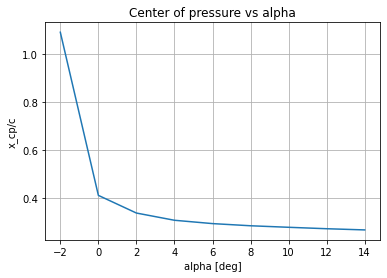

In [27]:
a = [-2, 0, 2, 4, 6, 8, 10, 12, 14]
cl = [0.05, .25, .44, .64, .85, 1.08, 1.26, 1.43, 1.56]
cm = [-0.042, -0.04, -0.038, -0.036, -0.036, -0.036, -0.034, -0.030, -0.025]
x_cp = np.zeros(9)
for i in range(len(a)):
    x_cp[i] = 0.25 - cm[i]/cl[i] # equation 1.22
plt.plot(a, x_cp)
plt.title('Center of pressure vs alpha')
plt.xlabel('alpha [deg]')
plt.ylabel('x_cp/c')
plt.grid()


According to the plot above, the center of pressure tends to move forward as the angle of attack increases. At an alpha of -2, the center of pressure is graphed as being beyond the airfoil's trailing edge which is unintuitive. For thicker non-symmetrical airfoils, the quarter chord and the center of pressure are not at the same location however, which may contribute to the strange behavior in the negative alpha domain.

### Problem 3.2: Dynamic Similarity
To have dynamic similarity between two flows, the similarity parameters of Mach number and Reynold's number need to match and the geometry over which the fluids flow over must be geometrically similar. This means that they can be of different sizes but must still be the same shape.

In [28]:
t1 = 199 # kelvin
rho1 = 1.23 # kg/m3
v1 = 141 # m/s
c1 = 1
t2 = 400 # kelvin
rho2 = 1.739 # kg/m3
v2 = 200 # m/s
c2 = 2

# assuming that the cp/cv ratio and gas constant are the same between the flows
R1 = rho1*v1*c1/np.sqrt(t1) # this is not the actual reynolds number because we are replacing mu with the square root of t1. mu and a are specified as proportional to square root of t.
R2 = rho2*v2*c2/np.sqrt(t2)
criteria = 0
if R1 == R2:
    print('Reynolds numbers match')
    criteria += 1
else:
    print('Reynolds numbers do not match')
    
M1 = v1/np.sqrt(t1)
M2 = v2/np.sqrt(t2)
if M1 == M2:
    print('Mach numbers match')
    criteria += 1
else:
    print('Mach numbers do not match')
    
if criteria == 2:
    print('The flows are dynamically similar')
else:
    print('The flows are NOT dynamically similar')


Reynolds numbers do not match
Mach numbers do not match
The flows are NOT dynamically similar


## Problem 3.3: Similarity Parameters
A lear jet is given as flying at a certain altitude and velocity in air with a given density and temperature. A one-fifth model is to be flown in a wind tunnel. The velocity, temperature, and density of the wind tunnel need to be picked such that the flows over the model and the actual aircraft are dynamically similar. The Reynolds number and Mach numbers need to match.

In [29]:
c1 = 5 # aribitrary 5x bigger than c2
v1 = 200 # m/s
alt1 = 10000 # m
rho1 = 0.414 # kg/m3
t1 = 223 # kelvin
c2 = 1

R1 = rho1*v1*c1/np.sqrt(t1)
M1 = v1/np.sqrt(t1)

# R1 = M1*rho1*c1
# R1 = R2, M1 = M2
# therefore 
rho2 = R1/M1/c2
print(f'Windtunnel density: {rho2:.2f} kg/m3')
# v2 and t2 can vary as long as they satisfy v2/np.sqrt(t2)=M1
# arbitrarily picking v2 = 200 m/s
v2 = 200
t2 = (v2/M1)**2
print(f'Model velocity: {v2} m/s')
print(f'Windtunnel temperature: {t2:.2f} K')


Windtunnel density: 2.07kg/m3
Model velocity: 200
Windtunnel temperature: 223.00


### Problem 3.4: Lift Coefficient
The lift coefficient is approximated for a Boeing 787 and a Cessna 152 at their given conditions assuming standard atmosphere conditions.

In [10]:
# L = W = Cl * 0.5 * rho * S * V**2
#Cl = 2*W/rho/S/V**2
w = 557000 # lbs
rho = 5.3365 # slugs/ft3
v = 561 # mph cruise speed
S = 4058 # ft2
Cl = 2*w/rho/S/(v**2)
print(f'a: {Cl:.6f}')




a: 0.000163
